In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
de_df = pd.read_csv('DEG_EN_Mig.csv')
print(de_df.head())

   Unnamed: 0     gene  log_fold_change          pvals      pvals_adj  \
0           0  IGFBPL1         0.587478  1.198643e-284  1.797964e-282   
1           1   PRSS12         1.335705  9.504131e-271  9.504131e-269   
2           2    INSM1         0.702201  4.868005e-169  2.086288e-167   
3           3    OPCML         1.670981  4.309595e-150  1.292879e-148   
4           4    SCN3B         0.803540  9.556271e-141  2.606256e-139   

   -log10_pval  
0   281.745219  
1   268.022088  
2   166.680626  
3   147.888442  
4   138.583983  


In [37]:
# Sort by log fold change
sorted_de_df = de_df.sort_values(by=['log_fold_change', '-log10_pval'], ascending=[False, False])
print(sorted_de_df.head())

    Unnamed: 0    gene  log_fold_change          pvals      pvals_adj  \
3            3   OPCML         1.670981  4.309595e-150  1.292879e-148   
1            1  PRSS12         1.335705  9.504131e-271  9.504131e-269   
24          24   CPNE8         1.224906   5.370746e-13   2.335107e-12   
14          14    DIO2         1.197640   4.635129e-27   3.476347e-26   
6            6   FEZF2         1.078703   9.582220e-87   1.796666e-85   

    -log10_pval  
3    147.888442  
1    268.022088  
24    11.631693  
14    25.458877  
6     84.745533  


In [38]:
# Select top 10/20 and bottom 10/20 genes
N = 20
top_genes = sorted_de_df.head(N)
bottom_genes = sorted_de_df.tail(N)
print("upregulated genes:")
print(top_genes)
print("downregulated genes:")
print(bottom_genes)

upregulated genes:
    Unnamed: 0       gene  log_fold_change          pvals      pvals_adj  \
3            3      OPCML         1.670981  4.309595e-150  1.292879e-148   
1            1     PRSS12         1.335705  9.504131e-271  9.504131e-269   
24          24      CPNE8         1.224906   5.370746e-13   2.335107e-12   
14          14       DIO2         1.197640   4.635129e-27   3.476347e-26   
6            6      FEZF2         1.078703   9.582220e-87   1.796666e-85   
64          64       LGR6         1.014866   1.006330e-03   2.141127e-03   
10          10  LINC01089         1.011572   1.207163e-40   1.248790e-39   
7            7      SMOC1         0.997914   2.149096e-85   3.792522e-84   
4            4      SCN3B         0.803540  9.556271e-141  2.606256e-139   
58          58       TPBG         0.744806   1.235640e-04   2.918834e-04   
20          20      TTYH2         0.736422   2.019620e-17   1.044631e-16   
15          15       SYBU         0.731538   1.312953e-22   8.951951e

In [39]:
# Combine top and bottom genes
selected_genes = pd.concat([top_genes, bottom_genes])
print(selected_genes)

     Unnamed: 0       gene  log_fold_change          pvals      pvals_adj  \
3             3      OPCML         1.670981  4.309595e-150  1.292879e-148   
1             1     PRSS12         1.335705  9.504131e-271  9.504131e-269   
24           24      CPNE8         1.224906   5.370746e-13   2.335107e-12   
14           14       DIO2         1.197640   4.635129e-27   3.476347e-26   
6             6      FEZF2         1.078703   9.582220e-87   1.796666e-85   
64           64       LGR6         1.014866   1.006330e-03   2.141127e-03   
10           10  LINC01089         1.011572   1.207163e-40   1.248790e-39   
7             7      SMOC1         0.997914   2.149096e-85   3.792522e-84   
4             4      SCN3B         0.803540  9.556271e-141  2.606256e-139   
58           58       TPBG         0.744806   1.235640e-04   2.918834e-04   
20           20      TTYH2         0.736422   2.019620e-17   1.044631e-16   
15           15       SYBU         0.731538   1.312953e-22   8.951951e-22   

In [40]:
# Assume de_df_example is your dataframe from the differential expression analysis
# Here we replace infinite values with the threshold of 400 for the -log10 p-values
selected_genes['-log10_pval'] = selected_genes['-log10_pval'].replace(np.inf, 400)
print(selected_genes)

     Unnamed: 0       gene  log_fold_change          pvals      pvals_adj  \
3             3      OPCML         1.670981  4.309595e-150  1.292879e-148   
1             1     PRSS12         1.335705  9.504131e-271  9.504131e-269   
24           24      CPNE8         1.224906   5.370746e-13   2.335107e-12   
14           14       DIO2         1.197640   4.635129e-27   3.476347e-26   
6             6      FEZF2         1.078703   9.582220e-87   1.796666e-85   
64           64       LGR6         1.014866   1.006330e-03   2.141127e-03   
10           10  LINC01089         1.011572   1.207163e-40   1.248790e-39   
7             7      SMOC1         0.997914   2.149096e-85   3.792522e-84   
4             4      SCN3B         0.803540  9.556271e-141  2.606256e-139   
58           58       TPBG         0.744806   1.235640e-04   2.918834e-04   
20           20      TTYH2         0.736422   2.019620e-17   1.044631e-16   
15           15       SYBU         0.731538   1.312953e-22   8.951951e-22   

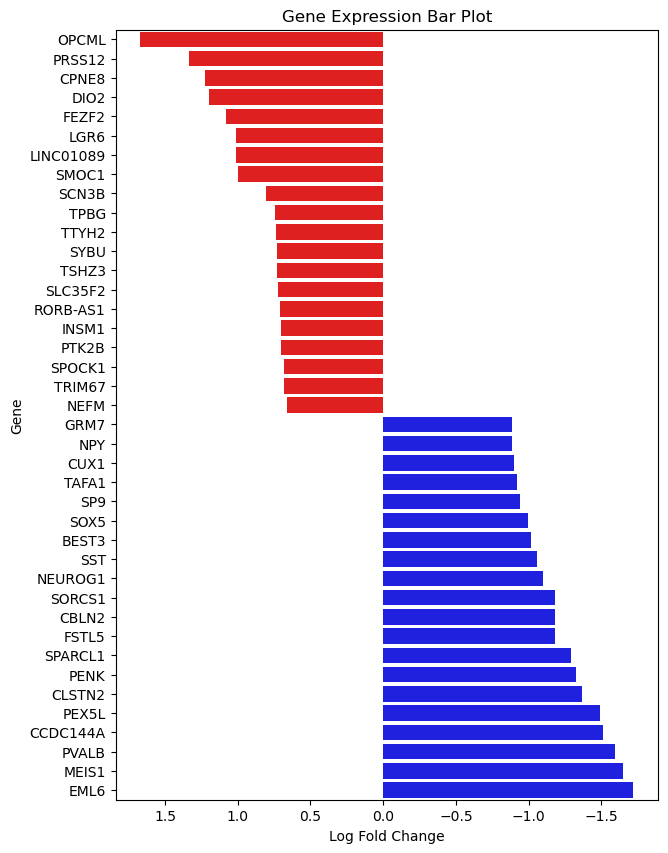

In [41]:
# Create the bar plot
selected_genes['color'] = ['red' if x > 0 else 'blue' for x in selected_genes['log_fold_change']]
plt.figure(figsize=(7, 10))
bar_plot = sns.barplot(
    x='log_fold_change',  # X-axis represents the log fold change values
    y='gene',  # Y-axis represents the gene names
    hue='color',
    data=selected_genes,
    dodge=False,
    palette={'red': 'red', 'blue': 'blue'},  # Use the coolwarm color palette
    orient='h'  # Horizontal bar plot
)
# Invert y-axis to have the top values at the top
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Set the axis labels and title
plt.xlabel('Log Fold Change')
plt.ylabel('Gene')
plt.title('Gene Expression Bar Plot')
bar_plot.get_legend().remove()

# Save the plot as a PDF
plt.savefig("top20V1V2bar_plot3.pdf")

# Show the plot
plt.show()